# Finance Club Project || Alpha Research


**Problem Statement**


Q2) The attached dataset containing time-series data for an asset's price along with 7 'signals.'

These 'signals' may serve as potential indicators for the current or future price of the asset.

The task requires the following:

● Clean and preprocess the data.

● Identify any relationships between the signals and the price.

● Quantify the strength of these relationships using numbers and plots.

● Utilize the signals in any manner to model the asset's price.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

## Cleaning and Pre-processing the data

In [ ]:
# Importing the dataset
df = pd.read_csv('drive/MyDrive/finclub/finclub_dataset.csv')
# Converting the Date column into datetime datatype
df["Date"] = pd.to_datetime(df["Date"].astype(str), format='%d-%m-%Y')

In [ ]:
# Removing the unnecessary serial number column
first_column = df.columns[0]
df = df.drop([first_column], axis=1)
df

,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,2016-11-30,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,2016-11-29,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,2016-11-28,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,2016-11-25,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,2016-11-23,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...,...
2995,2005-01-07,2016.540,2353.140,2069.7840,2791.5292,2444.1478,1303.1724,450.16,5072.4787
2996,2005-01-06,2019.430,2342.430,2057.5440,2789.7969,2424.1167,1301.5438,422.96,5074.6887
2997,2005-01-05,2012.290,2348.890,2050.2000,2789.8513,2423.0678,1302.0062,422.96,5089.3104
2998,2005-01-04,2019.600,2342.600,2052.1890,2790.3273,2418.6818,1300.3776,422.96,5081.3578


In [ ]:
# Collecting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3000 non-null   datetime64[ns]
 1   Price    3000 non-null   float64       
 2   Signal1  3000 non-null   float64       
 3   Signal2  2998 non-null   float64       
 4   Signal3  2998 non-null   float64       
 5   Signal4  2998 non-null   float64       
 6   Signal5  3000 non-null   float64       
 7   Signal6  2998 non-null   float64       
 8   Signal7  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 211.1 KB


Found a very few missing values, so it's better to drop the columns

In [ ]:
# Handling missing values
df = df.dropna()

In [ ]:
df

,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,2016-11-30,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,2016-11-29,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,2016-11-28,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,2016-11-25,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,2016-11-23,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...,...
2995,2005-01-07,2016.540,2353.140,2069.7840,2791.5292,2444.1478,1303.1724,450.16,5072.4787
2996,2005-01-06,2019.430,2342.430,2057.5440,2789.7969,2424.1167,1301.5438,422.96,5074.6887
2997,2005-01-05,2012.290,2348.890,2050.2000,2789.8513,2423.0678,1302.0062,422.96,5089.3104
2998,2005-01-04,2019.600,2342.600,2052.1890,2790.3273,2418.6818,1300.3776,422.96,5081.3578


In [ ]:
# The indexing due to dropna has few missing columns, so resetting it ot get the correct index
df=df.reset_index()
df=df.drop(['index'],axis=1)
df

,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,2016-11-30,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,2016-11-29,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,2016-11-28,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,2016-11-25,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,2016-11-23,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...,...
2985,2005-01-07,2016.540,2353.140,2069.7840,2791.5292,2444.1478,1303.1724,450.16,5072.4787
2986,2005-01-06,2019.430,2342.430,2057.5440,2789.7969,2424.1167,1301.5438,422.96,5074.6887
2987,2005-01-05,2012.290,2348.890,2050.2000,2789.8513,2423.0678,1302.0062,422.96,5089.3104
2988,2005-01-04,2019.600,2342.600,2052.1890,2790.3273,2418.6818,1300.3776,422.96,5081.3578


## Visualizing the data using various tools

Identifying the relation between signals and the asset price

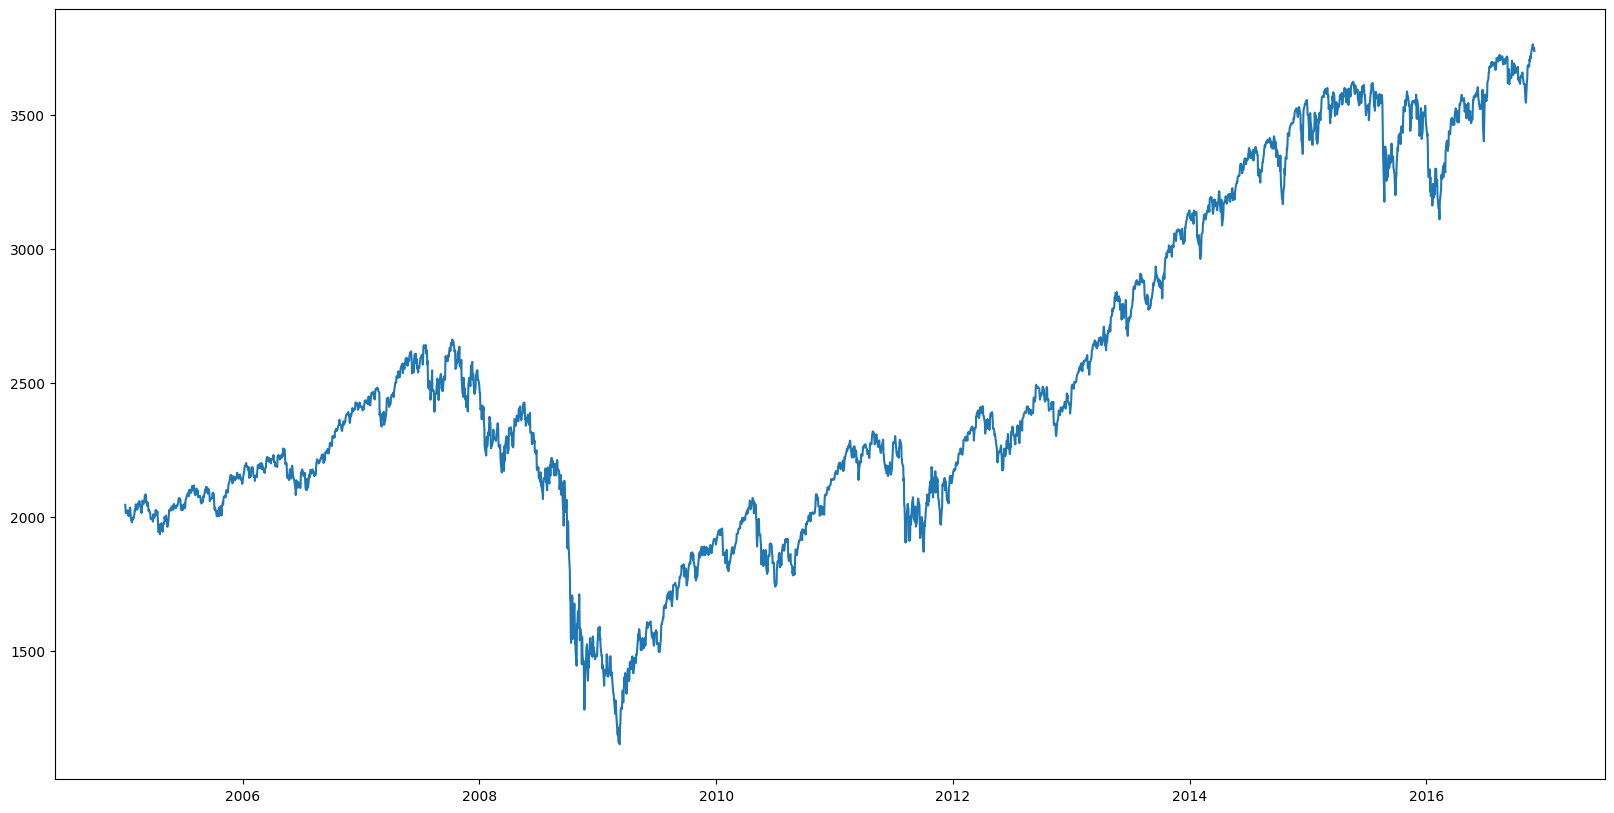

In [ ]:
# Plotting Price vs Date to visualize the trend in the data
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['Price'])

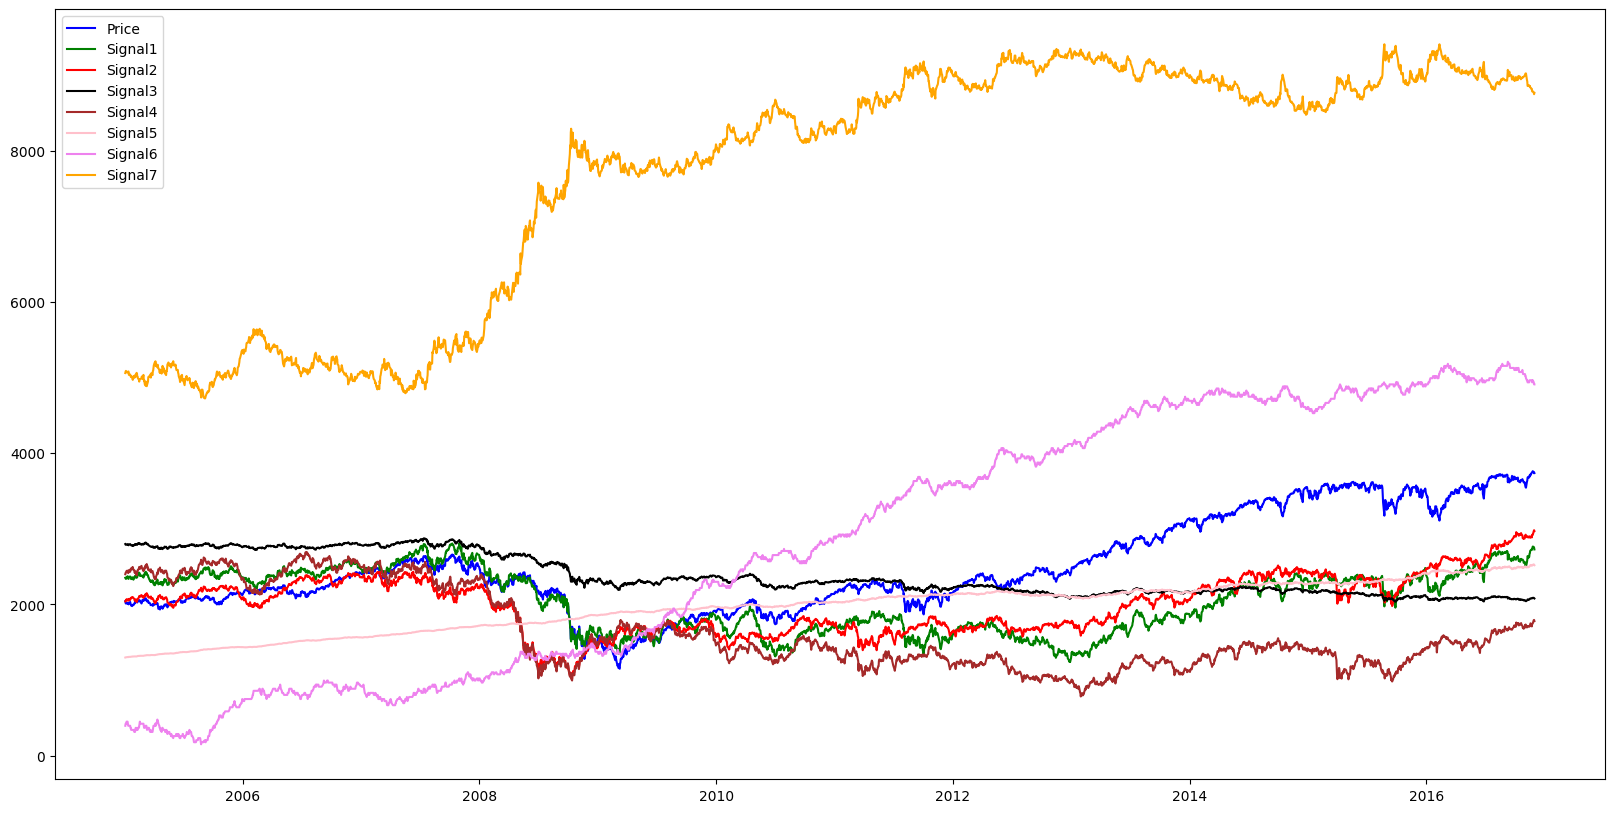

In [ ]:
# Plotting all the columns vs Date to visualize the trend in them
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['Price'], 'blue', label='Price')
plt.plot(df['Date'],df['Signal1'],'green',label='Signal1')
plt.plot(df['Date'],df['Signal2'],'red',label='Signal2')
plt.plot(df['Date'],df['Signal3'],'black',label='Signal3')
plt.plot(df['Date'],df['Signal4'],'brown',label='Signal4')
plt.plot(df['Date'],df['Signal5'],'pink',label='Signal5')
plt.plot(df['Date'],df['Signal6'],'violet',label='Signal6')
plt.plot(df['Date'],df['Signal7'],'orange',label='Signal7')
plt.legend(["Price", "Signal1", "Signal2", "Signal3", "Signal4", "Signal5", "Signal6", "Signal7"], loc ="upper left")

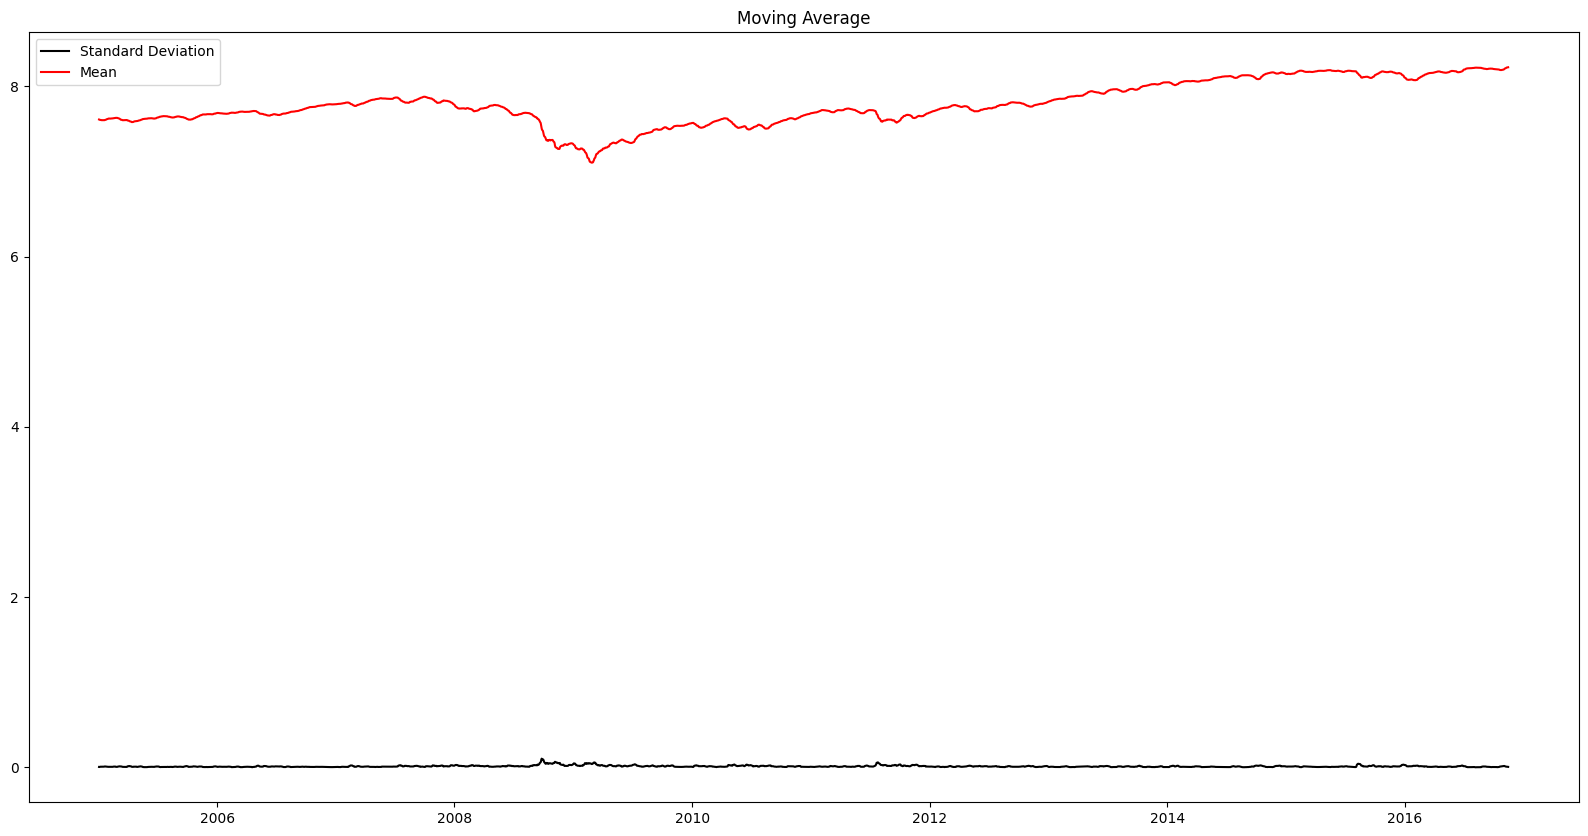

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
price_log=np.log(df['Price'])
moving_avg=price_log.rolling(12).mean()
std_dev=price_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(df['Date'], std_dev, color='black', label="Standard Deviation")
plt.plot(df['Date'], moving_avg, color="red", label="Mean")
plt.legend()
plt.show()

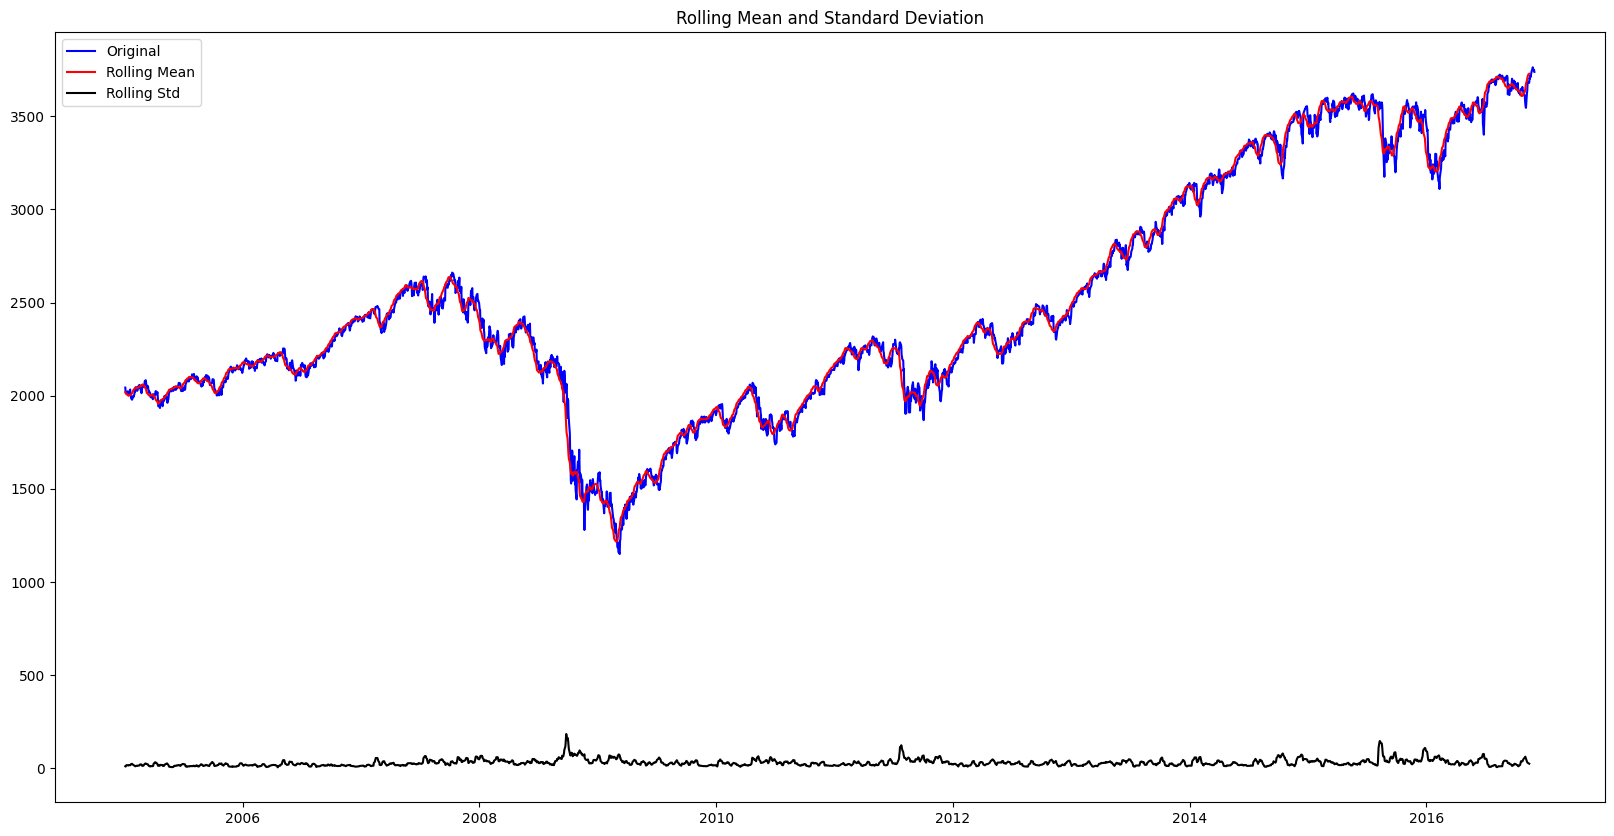

Results of dickey fuller test
Test Stats                    -1.631983
p-value                        0.466453
No. of lags used              20.000000
No. of observations used    2969.000000
Critical value (1%)           -3.432554
dtype: float64
Test Stats                    -1.631983
p-value                        0.466453
No. of lags used              20.000000
No. of observations used    2969.000000
Critical value (1%)           -3.432554
Critical value (5%)           -2.862514
dtype: float64
Test Stats                    -1.631983
p-value                        0.466453
No. of lags used              20.000000
No. of observations used    2969.000000
Critical value (1%)           -3.432554
Critical value (5%)           -2.862514
Critical value (10%)          -2.567288
dtype: float64


In [ ]:
# Checking if data is stationary
from statsmodels.tsa.stattools import adfuller
def test_adf(timeseries):
  moving_average=timeseries.rolling(12).mean()
  moving_std=timeseries.rolling(12).std()
  plt.figure(figsize=(20,10))
  plt.plot(df['Date'],timeseries, color='blue',label='Original')
  plt.plot(df['Date'], moving_average, color='red', label='Rolling Mean')
  plt.plot(df['Date'], moving_std, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)
  print("Results of dickey fuller test")
  adft=adfuller(timeseries,autolag='AIC')
  output=pd.Series(adft[0:4],index=['Test Stats','p-value','No. of lags used','No. of observations used'])
  for key,value in adft[4].items():
    output['Critical value (%s)'%key]=value
    print(output)

test_adf(df['Price'])

In [ ]:
# Converting the date column to numbers to be usable in modelling as it has a
# significant role in the price
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)-731948
df

,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,4350,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,4349,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,4348,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,4345,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,4343,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...,...
2985,5,2016.540,2353.140,2069.7840,2791.5292,2444.1478,1303.1724,450.16,5072.4787
2986,4,2019.430,2342.430,2057.5440,2789.7969,2424.1167,1301.5438,422.96,5074.6887
2987,3,2012.290,2348.890,2050.2000,2789.8513,2423.0678,1302.0062,422.96,5089.3104
2988,2,2019.600,2342.600,2052.1890,2790.3273,2418.6818,1300.3776,422.96,5081.3578


<Axes: >

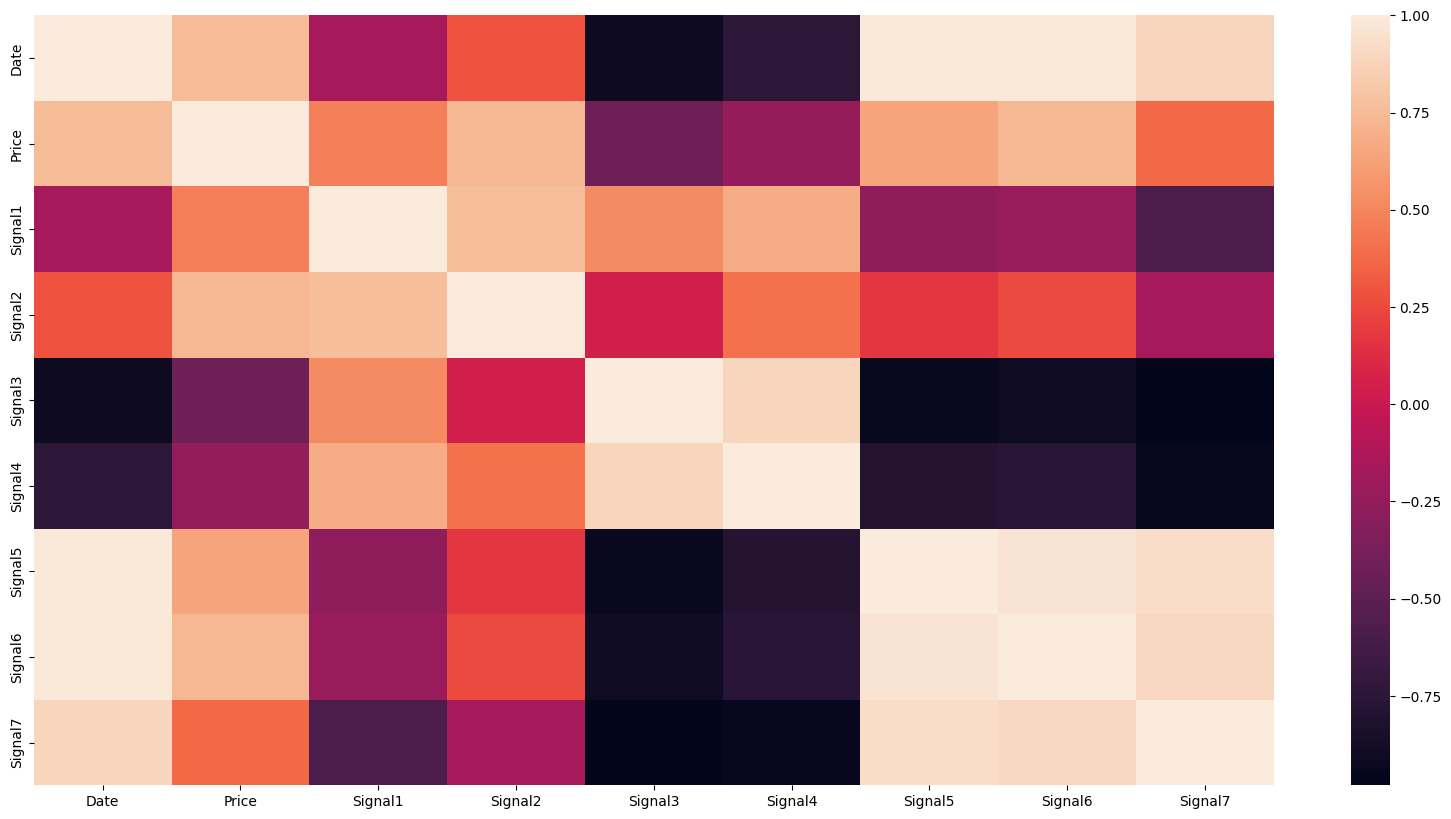

In [ ]:
# Using seaborn to visualize the correlation between each column
import seaborn
correlation = df.corr()
seaborn.heatmap(correlation)

In [ ]:
correlation

,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
Date,1.000000,0.750529,-0.164052,0.284846,-0.911590,-0.747640,0.981437,0.982350,0.884212
Price,0.750529,1.000000,0.472847,0.732001,-0.430648,-0.242395,0.638474,0.730614,0.379781
Signal1,-0.164052,0.472847,1.000000,0.760523,0.526697,0.675318,-0.261623,-0.224141,-0.584211
Signal2,0.284846,0.732001,0.760523,1.000000,0.048056,0.409062,0.168245,0.255217,-0.166534
Signal3,-0.911590,-0.430648,0.526697,0.048056,1.000000,0.883999,-0.935179,-0.906970,-0.979953
Signal4,-0.747640,-0.242395,0.675318,0.409062,0.883999,1.000000,-0.790338,-0.765480,-0.942167
Signal5,0.981437,0.638474,-0.261623,0.168245,-0.935179,-0.790338,1.000000,0.955619,0.923597
Signal6,0.982350,0.730614,-0.224141,0.255217,-0.906970,-0.765480,0.955619,1.000000,0.895296
Signal7,0.884212,0.379781,-0.584211,-0.166534,-0.979953,-0.942167,0.923597,0.895296,1.000000


The correlation coefficient of >|0.25| signifies a good trend between the features and the sign of the coefficient indicates a direct or inverse relation between the same.

We can comfirm that the date column has significant direct impact on the asset price.

The Signals 2, 5 and 6 have significant positive impact on the asset price which indicates us a general increase in the asset price as the signals increase and vice versa.

The Signals 3 and 4 have negative correlation with the asset price which indicates an inverse relation between the asset price and the signals.

# Checking various models to get as high accuracy as possible

## **Theil-Sen Regression Model**

The Theil-Sen regression model, also known as Sen's slope estimator, is a non-parametric method for estimating the slope of a linear relationship between two variables in a dataset. It provides a robust alternative to Ordinary Least Squares (OLS) regression {Example: Simple Linear Regression} when the data contain outliers or are not normally distributed.

In [ ]:
# Independent features
X = df[['Date','Signal1','Signal2','Signal3','Signal4','Signal5','Signal6','Signal7']]
# Target Column
y = df['Price']

In [ ]:
X

,Date,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,4350,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,4349,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,4348,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,4345,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,4343,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...
2985,5,2353.140,2069.7840,2791.5292,2444.1478,1303.1724,450.16,5072.4787
2986,4,2342.430,2057.5440,2789.7969,2424.1167,1301.5438,422.96,5074.6887
2987,3,2348.890,2050.2000,2789.8513,2423.0678,1302.0062,422.96,5089.3104
2988,2,2342.600,2052.1890,2790.3273,2418.6818,1300.3776,422.96,5081.3578


In [ ]:
y

0       3737.977
1       3747.922
2       3742.924
3       3762.695
4       3748.024
          ...   
2985    2016.540
2986    2019.430
2987    2012.290
2988    2019.600
2989    2043.570
Name: Price, Length: 2990, dtype: float64

In [ ]:
# Splitting the data into train and test in the ratio 80:20
train_X = X[598:]
test_X = X[:598]
train_y = y[598:]
test_y = y[:598]

In [ ]:
test_X

,Date,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,4350,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,4349,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,4348,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,4345,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,4343,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...
593,3491,2258.178,2272.4172,2212.2032,1343.6885,2261.4913,4720.56,8720.7399
594,3490,2288.166,2307.4389,2219.8192,1379.9665,2265.6342,4747.76,8696.2905
595,3489,2272.917,2317.6899,2216.4039,1381.9776,2260.7246,4720.56,8677.3066
596,3488,2253.401,2358.9999,2211.9890,1409.9188,2255.8201,4720.56,8661.1906


In [ ]:
test_y

0      3737.977
1      3747.922
2      3742.924
3      3762.695
4      3748.024
         ...   
593    3363.178
594    3379.566
595    3377.917
596    3372.001
597    3355.171
Name: Price, Length: 598, dtype: float64

In [ ]:
train_X.shape

(2392, 8)

In [ ]:
train_y.shape

(2392,)

In [ ]:
train_y

598     3362.974
599     3328.804
600     3368.669
601     3354.576
602     3361.070
          ...   
2985    2016.540
2986    2019.430
2987    2012.290
2988    2019.600
2989    2043.570
Name: Price, Length: 2392, dtype: float64

In [ ]:
# Importing libraries
from sklearn.linear_model import TheilSenRegressor
regressor = TheilSenRegressor()

In [ ]:
# Fitting the model with the data
regressor.fit(train_X,train_y)

TheilSenRegressor()

In [ ]:
# Predicting the prices using test columns
predicted=regressor.predict(test_X)

In [ ]:
predicted.shape

(598,)

In [ ]:
dfr=pd.DataFrame({'Actual':test_y,'Predicted':predicted.round(3),'Difference':abs(test_y-predicted.round(3))})
dfr

,Actual,Predicted,Difference
0,3737.977,3737.963,0.014
1,3747.922,3747.908,0.014
2,3742.924,3742.912,0.012
3,3762.695,3762.682,0.013
4,3748.024,3748.011,0.013
...,...,...,...
593,3363.178,3363.173,0.005
594,3379.566,3379.561,0.005
595,3377.917,3377.912,0.005
596,3372.001,3371.994,0.007


Root Mean Squared Error: 6.0202709302471344


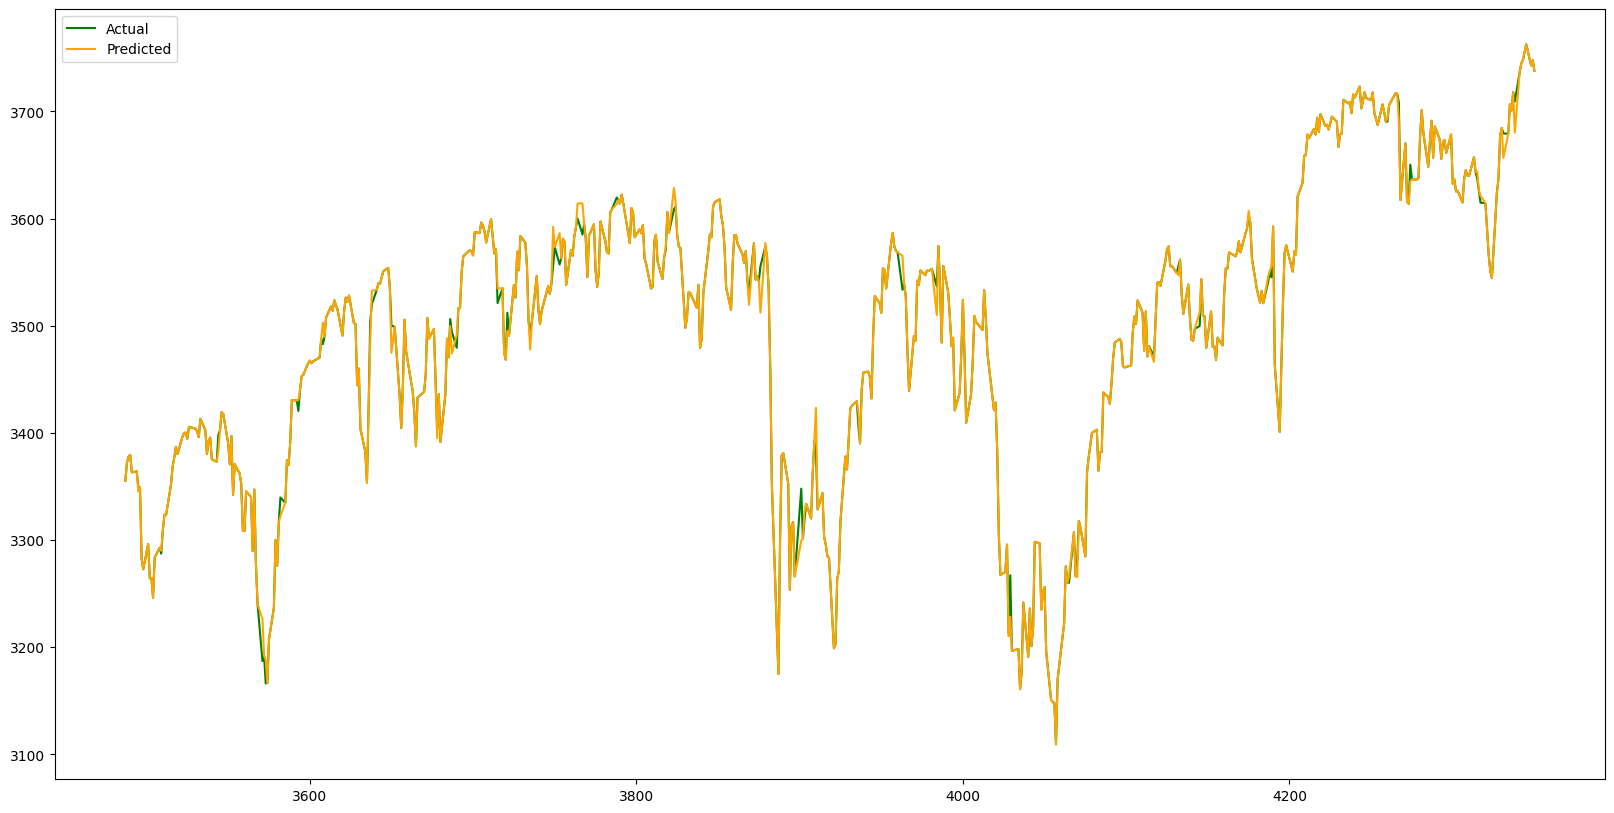

In [ ]:
# Calculating RMSE
import math
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(test_y,predicted.round(3))))
# Visualize the predictions
plt.figure(figsize=(20,10))
plt.plot(test_X['Date'],test_y,'green',label='Actual Price')
plt.plot(test_X['Date'],predicted,'orange',label='Predicted Price')
plt.legend(["Actual", "Predicted"], loc ="upper left")

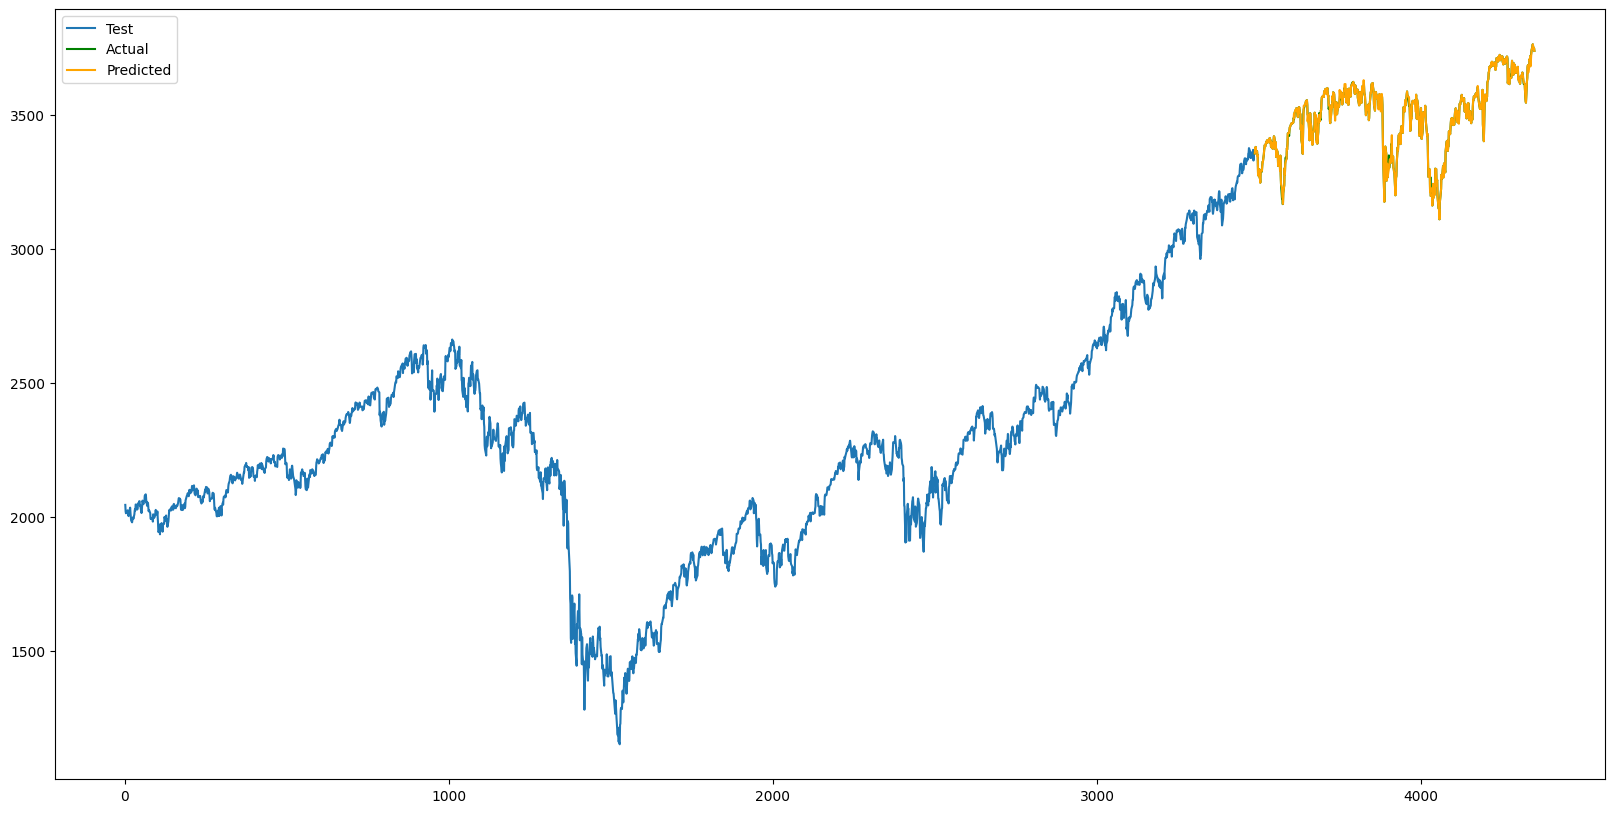

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_X['Date'],train_y)
plt.plot(test_X['Date'],test_y,'green',label='Actual Price')
plt.plot(test_X['Date'],predicted,'orange',label='Predicted Price')
plt.legend(["Test","Actual", "Predicted"], loc ="upper left")

## **ARIMA Model**

ARIMA models are one of the most classic and most widely used statistical forecasting techniques when dealing with univariate time series. It basically uses the lag values and lagged forecast errors to predict the feature values.

**AR:** using the lags of previous values

**I:** non-stationary differencing

**MA:** moving average for the error term

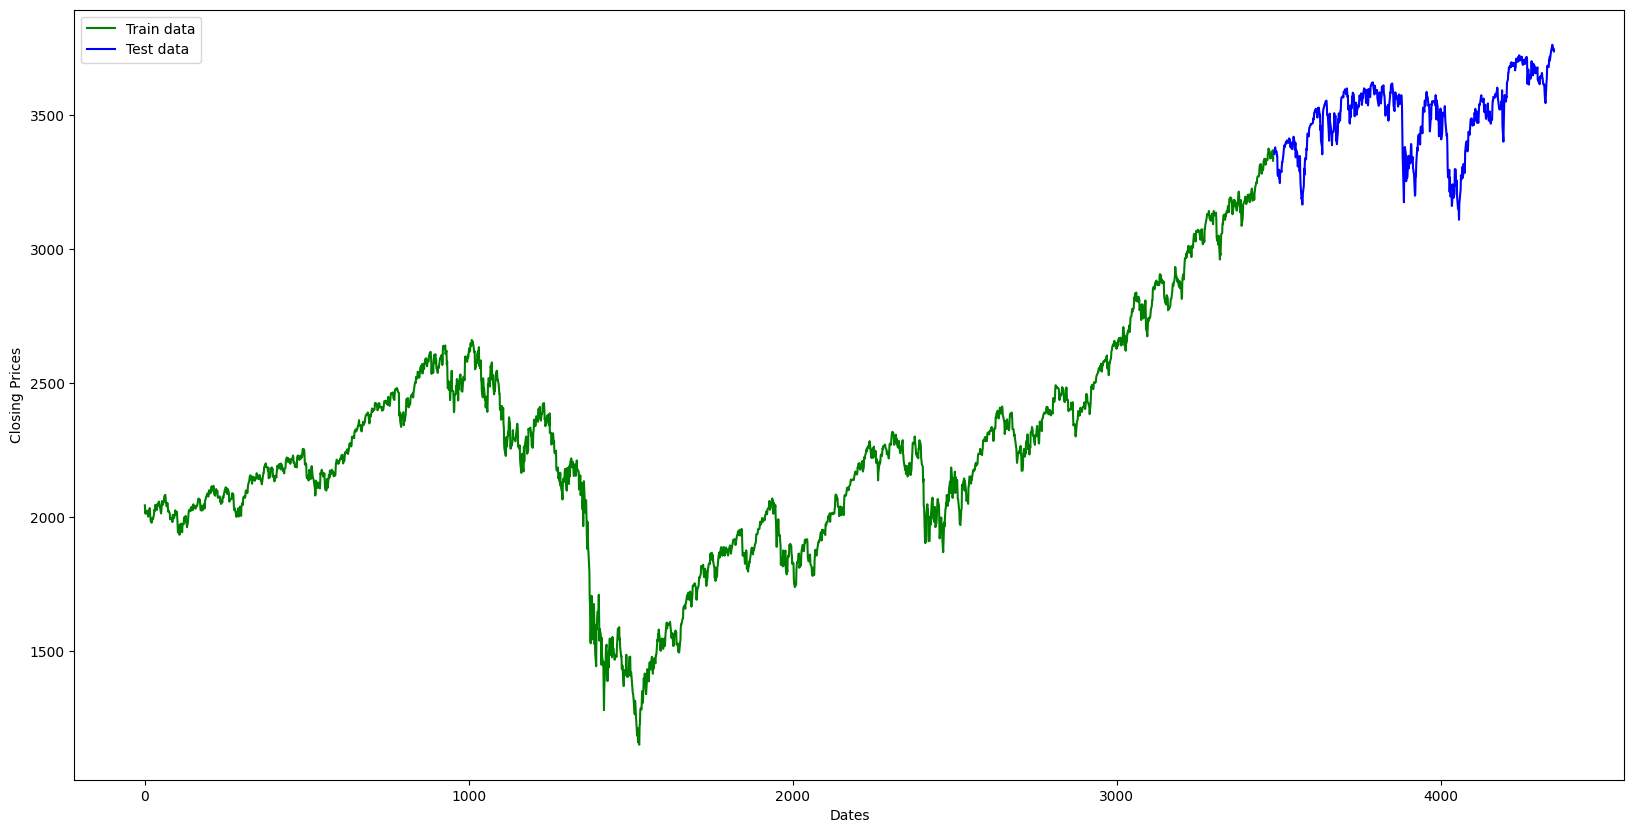

In [ ]:
# Splitting the data into train and test data in the ratio 80:20
train_data,test_data=df[int(len(df)*0.2):], df[:int(len(df)*0.2)]
# Visualizing the data split
plt.figure(figsize=(20,10))
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Date'][int(len(df)*0.2):],train_data['Price'], 'green', label='Train data')
plt.plot(df['Date'][:int(len(df)*0.2)],test_data['Price'], 'blue', label='Test data')
plt.legend()

### **Implementing ARIMA Model**

In [ ]:
test_data

,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,4350,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,4349,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,4348,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,4345,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,4343,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...,...
593,3491,3363.178,2258.178,2272.4172,2212.2032,1343.6885,2261.4913,4720.56,8720.7399
594,3490,3379.566,2288.166,2307.4389,2219.8192,1379.9665,2265.6342,4747.76,8696.2905
595,3489,3377.917,2272.917,2317.6899,2216.4039,1381.9776,2260.7246,4720.56,8677.3066
596,3488,3372.001,2253.401,2358.9999,2211.9890,1409.9188,2255.8201,4720.56,8661.1906


In [ ]:
train_data

,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
598,3484,3362.974,2244.374,2396.46960,2210.61200,1441.7258,2255.0568,4747.76,8663.0198
599,3483,3328.804,2223.804,2406.39930,2206.35010,1457.0819,2259.1895,4774.96,8703.8929
600,3482,3368.669,2277.269,2415.28095,2209.74925,1491.0598,2263.3171,4747.76,8623.4846
601,3481,3354.576,2249.576,2424.16260,2213.14840,1472.4516,2258.4211,4747.76,8648.5477
602,3480,3361.070,2269.670,2437.02990,2218.44900,1490.2693,2262.5453,4774.96,8646.9854
...,...,...,...,...,...,...,...,...,...
2985,5,2016.540,2353.140,2069.78400,2791.52920,2444.1478,1303.1724,450.16,5072.4787
2986,4,2019.430,2342.430,2057.54400,2789.79690,2424.1167,1301.5438,422.96,5074.6887
2987,3,2012.290,2348.890,2050.20000,2789.85130,2423.0678,1302.0062,422.96,5089.3104
2988,2,2019.600,2342.600,2052.18900,2790.32730,2418.6818,1300.3776,422.96,5081.3578


In [ ]:
# Obtaining the useful independent features to predict the asset price in train dataset
exog_train=train_data[['Date','Signal1','Signal2','Signal3','Signal4','Signal5','Signal6','Signal7']]
exog_train

,Date,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
598,3484,2244.374,2396.46960,2210.61200,1441.7258,2255.0568,4747.76,8663.0198
599,3483,2223.804,2406.39930,2206.35010,1457.0819,2259.1895,4774.96,8703.8929
600,3482,2277.269,2415.28095,2209.74925,1491.0598,2263.3171,4747.76,8623.4846
601,3481,2249.576,2424.16260,2213.14840,1472.4516,2258.4211,4747.76,8648.5477
602,3480,2269.670,2437.02990,2218.44900,1490.2693,2262.5453,4774.96,8646.9854
...,...,...,...,...,...,...,...,...
2985,5,2353.140,2069.78400,2791.52920,2444.1478,1303.1724,450.16,5072.4787
2986,4,2342.430,2057.54400,2789.79690,2424.1167,1301.5438,422.96,5074.6887
2987,3,2348.890,2050.20000,2789.85130,2423.0678,1302.0062,422.96,5089.3104
2988,2,2342.600,2052.18900,2790.32730,2418.6818,1300.3776,422.96,5081.3578


In [ ]:
# Obtaining the useful independent features to predict the asset price in test dataset
exog_test=test_data[['Date','Signal1','Signal2','Signal3','Signal4','Signal5','Signal6','Signal7']]
exog_test

,Date,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,4350,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,4349,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,4348,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,4345,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,4343,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...
593,3491,2258.178,2272.4172,2212.2032,1343.6885,2261.4913,4720.56,8720.7399
594,3490,2288.166,2307.4389,2219.8192,1379.9665,2265.6342,4747.76,8696.2905
595,3489,2272.917,2317.6899,2216.4039,1381.9776,2260.7246,4720.56,8677.3066
596,3488,2253.401,2358.9999,2211.9890,1409.9188,2255.8201,4720.56,8661.1906


In ARIMA models, the exog parameter is used to incorporate exogenous variables into the forecasting process. Exogenous variables are independent variables that are not part of the time series being forecasted but may have an influence on the dependent variable.

The exog parameter allows you to include these exogenous variables when fitting an ARIMA model and making forecasts.

### **Using grid search method to find the perfect parameters (p, d, q) for our ARIMA Model**

In [ ]:
from sklearn.metrics import mean_squared_error
# Create and fit the ARIMA model
def evaluate_arima_model(order):
  model = ARIMA(train_data['Price'], order=order, exog=exog_train)
  model_fit = model.fit()

  predictions = model_fit.forecast(steps=598, exog=exog_test)
  predictions=predictions.reset_index()
  predictions=predictions.drop(['index'],axis=1)
  mse = mean_squared_error(test_data['Price'], predictions['predicted_mean'])
  return mse

In [ ]:
# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Initialize variables for best model and minimum MSE
best_model = None
best_mse = float('inf')

# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mse = evaluate_arima_model(order)
                if mse < best_mse:
                    best_mse = mse
                    best_model = order
            except:
                continue

# Print the best model and its corresponding MSE
print('Best Model: ARIMA{}'.format(best_model))
print('Best MSE: {}'.format(best_mse))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Like

Best Model: ARIMA(0, 0, 0)
Best MSE: 37.73294043113057


In [ ]:
# Predict using the best parameters obtained for ARIMA model
model = ARIMA(train_data['Price'], order=(0,0,0), exog=exog_train)
model_fit = model.fit()
predictions = model_fit.forecast(steps=598, exog=exog_test)
predictions

2990    3735.677450
2991    3745.295339
2992    3740.235208
2993    3760.073596
2994    3745.711607
           ...     
3583    3361.941300
3584    3378.034396
3585    3376.433349
3586    3370.480424
3587    3353.745132
Name: predicted_mean, Length: 598, dtype: float64

In [ ]:
# Reseting the index of predictions dataset as required
predictions=predictions.reset_index()
predictions=predictions.drop(['index'],axis=1)
predictions

,predicted_mean
0,3735.677450
1,3745.295339
2,3740.235208
3,3760.073596
4,3745.711607
...,...
593,3361.941300
594,3378.034396
595,3376.433349
596,3370.480424


In [ ]:
test_data['Price']

0      3737.977
1      3747.922
2      3742.924
3      3762.695
4      3748.024
         ...   
593    3363.178
594    3379.566
595    3377.917
596    3372.001
597    3355.171
Name: Price, Length: 598, dtype: float64

In [ ]:
# Tabulating the actual price and predicted price dataframes to obtain the difference
dfr_arima=pd.DataFrame({'Actual':test_data['Price'],'Predicted':predictions['predicted_mean'].round(3),'Difference':abs(test_data['Price']-predictions['predicted_mean'].round(3))})
dfr_arima

,Actual,Predicted,Difference
0,3737.977,3735.677,2.300
1,3747.922,3745.295,2.627
2,3742.924,3740.235,2.689
3,3762.695,3760.074,2.621
4,3748.024,3745.712,2.312
...,...,...,...
593,3363.178,3361.941,1.237
594,3379.566,3378.034,1.532
595,3377.917,3376.433,1.484
596,3372.001,3370.480,1.521


Root Mean Squared Error (RMSE): 6.142714418816047


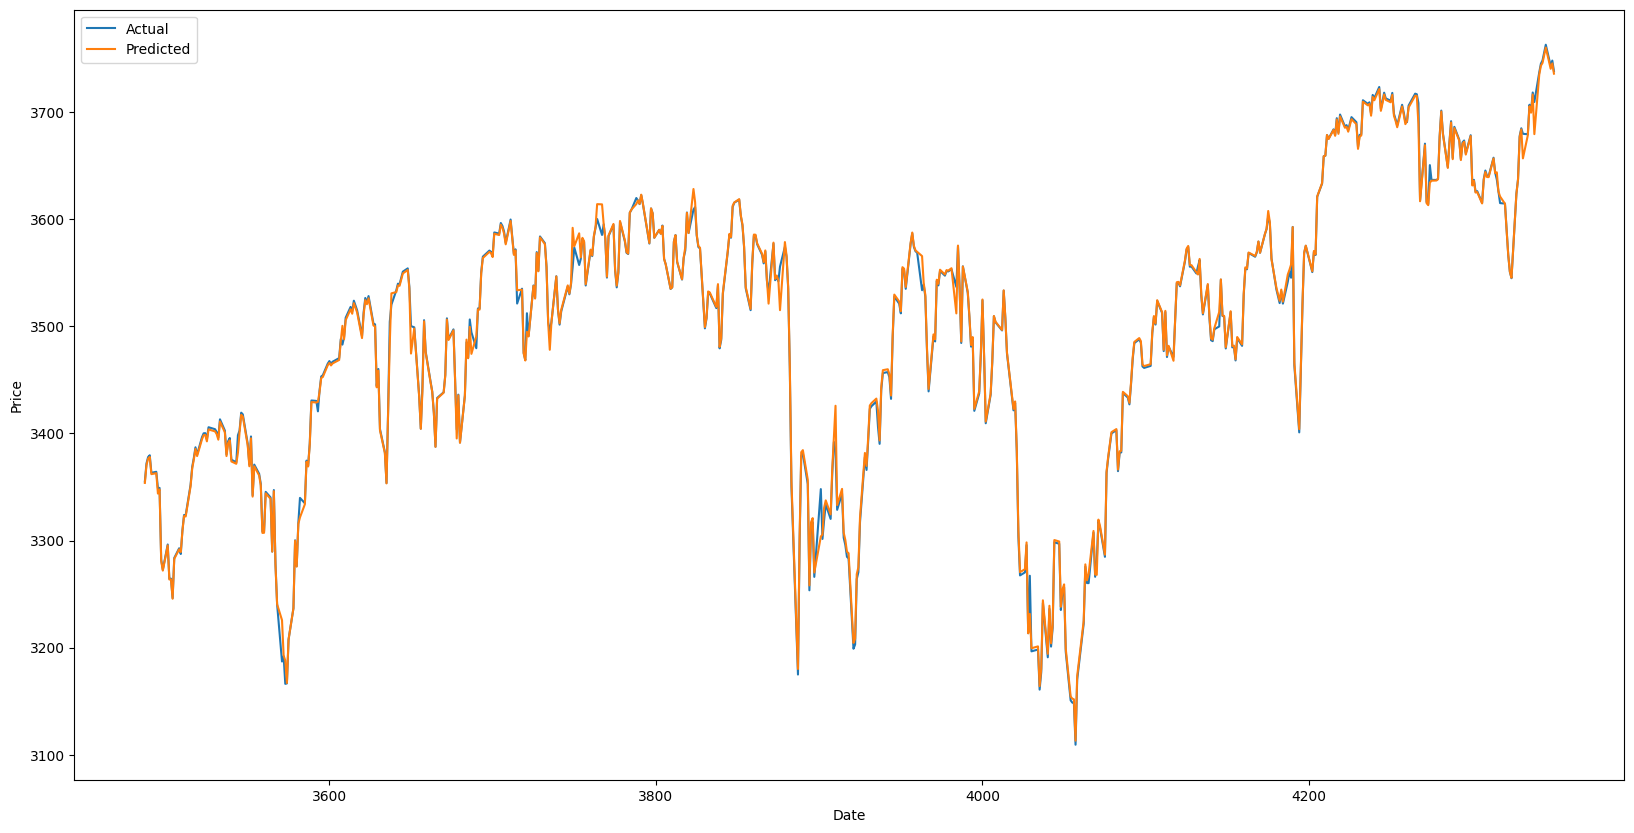

In [ ]:
import math
# Calculate RMSE
MSE = np.mean((predictions['predicted_mean'] - test_data['Price']) ** 2)
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error (RMSE):", RMSE)
# Visualize the predictions in plot
plt.plot(test_data['Date'], test_data['Price'], label='Actual')
plt.plot(test_data['Date'], predictions['predicted_mean'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

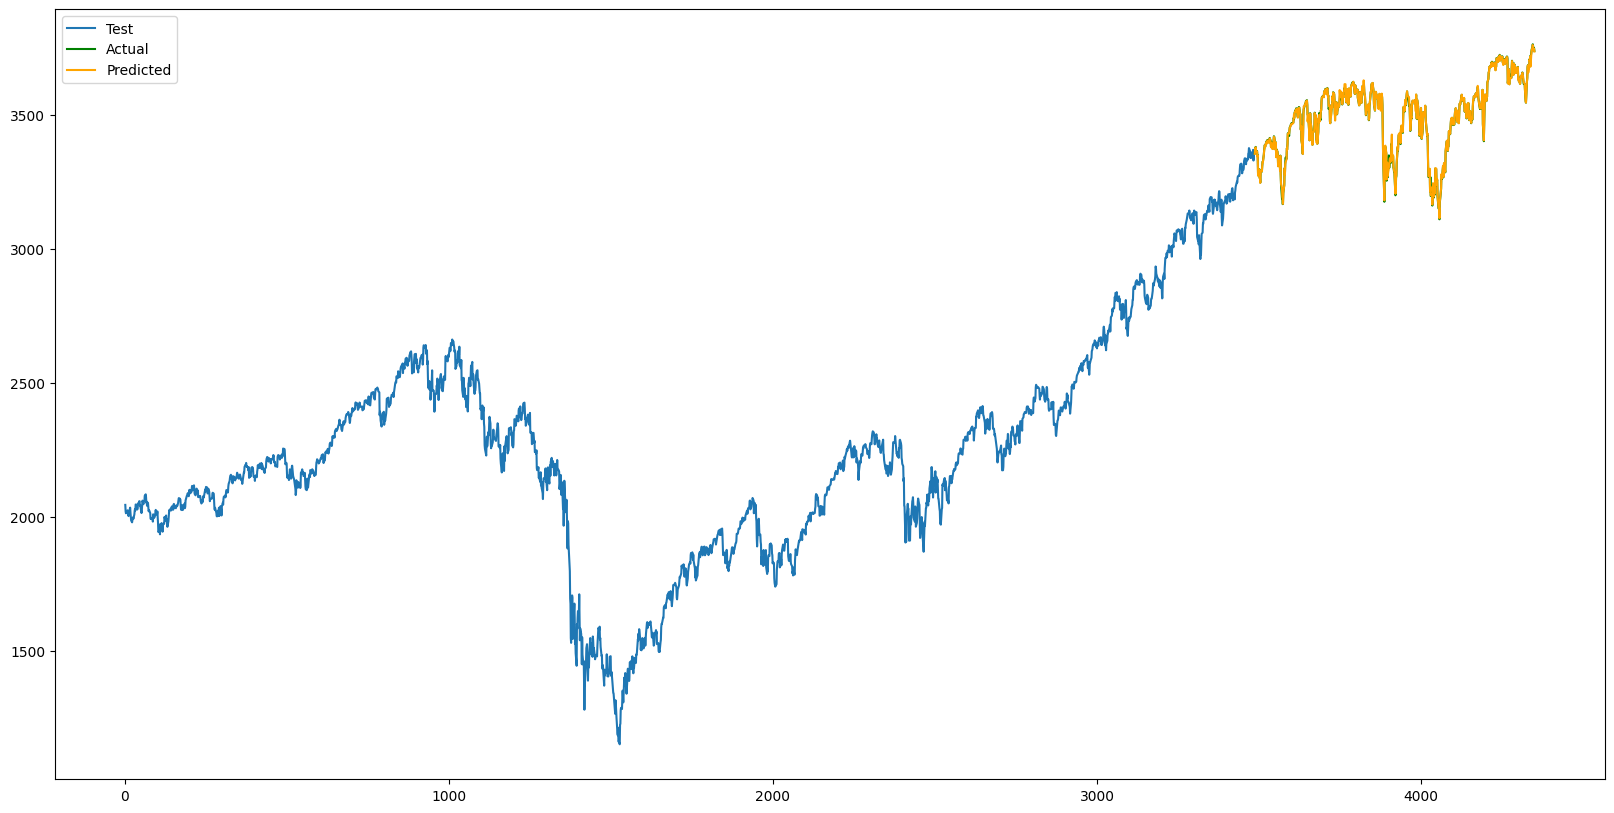

In [ ]:
# Plotting the actual prices of the whole dataset along with the predicted prices
plt.figure(figsize=(20,10))
plt.plot(train_data['Date'],train_data['Price'])
plt.plot(test_data['Date'],test_data['Price'],'green',label='Actual Price')
plt.plot(test_data['Date'],predictions['predicted_mean'],'orange',label='Predicted Price')
plt.legend(["Test","Actual", "Predicted"], loc ="upper left")

## **Final Conclusion**

**The best model was obtained using TheilSen Regression with really great accuracy scores compared to other models tried.**

We did try many other models as well such as:

**1) Linear Regression:** It was giving an RMSE slightly greater than TheilSen Regression model, so preferred choosing the later one.

**2) XGBoost Regressor:** It gave an RMSE of about 18 which was a very bad prediction.

**3) ARIMA Models:** Verified the accuracy of using ARIMA model to get the best parameters (p,d,q) using grid search method under the condition of least MSE.

**Concluding with final accuracy scores of our best two models**

In [ ]:
# Accuracy Scores for TheilSen Regression Model
print('RMSE:',math.sqrt(metrics.mean_squared_error(test_y,predicted.round(3))))
print("R2 score =", metrics.r2_score(test_y, predicted.round(3)))

RMSE: 6.0202709302471344
R2 score = 0.9979736127874295


In [ ]:
# Accuracy Scores for ARIMA Model
print('RMSE:',math.sqrt(np.mean((predictions['predicted_mean'] - test_data['Price']) ** 2)))
print("R2 score =", metrics.r2_score(test_data['Price'], predictions['predicted_mean'].round(3)))

RMSE: 6.142714418816047
R2 score = 0.9978903491765228
